# Credit Card Fraud Analysis

Digital payments are evolving, but so are cyber criminals. 

According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments. 

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

Following analysis has been done using this dataset: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

## Problem Statement:

### 1. Fraud Detection Based on Transaction Location:
   Analyze how the distance from home and distance from the last transaction affect the likelihood of fraud. Are transactions that occur farther from      home or the last transaction more likely to be fraudulent?
### 2. Impact of Transaction Value on Fraud:
   Investigate the relationship between the ratio of the transaction's purchase price to the median purchase price and the likelihood of fraud. Do         unusually high or low purchase values correlate with higher fraud risk?
### 3. Retailer and Fraud Correlation:
   Study the effect of repeat purchases from the same retailer on fraud occurrence. Is fraud more common in repeat transactions from the same retailer     or in transactions from new retailers? <br />
### 4. Effect of Chip and PIN Usage on Fraud:
   Examine whether transactions using a chip or PIN are less likely to be fraudulent compared to those without Chip or PIN usage. Can Chip and PIN         usage be reliable indicators of legitimate transactions? And comapred to PIN, how safe is using Chip (Credit Card)?
### 5. Online vs. Offline Fraud Patterns:
   Analyze whether online orders are more susceptible to fraud than in-store transactions. Are there distinct patterns in fraud rates between online and
   offline orders?

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter

## Loading dataset

In [2]:
table = pd.read_csv('card_transdata.csv')

### Reading & Understanding dataset

In [3]:
table.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
table.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [5]:
table.shape

(1000000, 8)

In [6]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
table.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [8]:
table.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
table.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

## Exploratory Data Analysis

In [10]:
table["fraud_label"] = table["fraud"].replace({0:"Legal  Transactions", 1:"Fraudulent Transactions"})

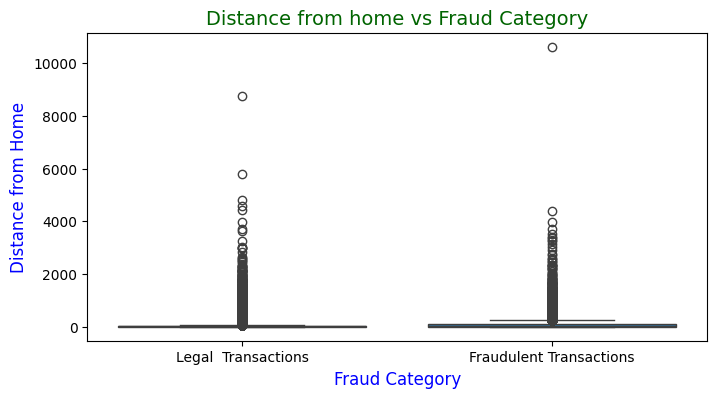

In [11]:
plt.figure(figsize=(8,4))
axis = sns.boxplot(x="fraud_label", y="distance_from_home", data=table)
axis.set_xlabel("Fraud Category", color="blue", fontsize=12)
axis.set_ylabel("Distance from Home", color="blue", fontsize=12)
axis.set_title("Distance from home vs Fraud Category", color="darkgreen", fontsize=14)
plt.show()

### Fraud Detection Based on Transaction Location:
No clear pattern in the values of the column "distance_from_home" to indicate possibilty of fraud. 

As we can see fraud can take place at all possible distance values. There is no way we can say that fraud takes place only closer to home or farther away. Thus this cannot be used as a parameter to understand fraudulent transactions.

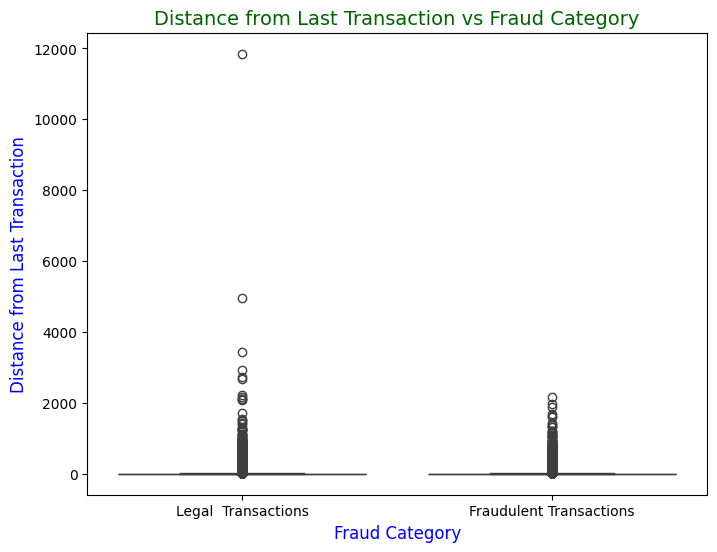

In [12]:
plt.figure(figsize=(8,6))
axis = sns.boxplot(x="fraud_label", y="distance_from_last_transaction", data=table)
axis.set_title("Distance from Last Transaction vs Fraud Category", color="darkgreen", fontsize="14")
axis.set_ylabel("Distance from Last Transaction", color="blue", fontsize="12")
axis.set_xlabel("Fraud Category", color="blue", fontsize="12")
plt.show()

### Fraud Detection Based on Transaction Location:
No clear pattern in the values of the column "distance_from_last_transaction" to indicate possibilty of fraud.

Fraudelent transactions are more concentrated towards lower distances as compared to legal transactions. But this is only nominal as there are very few values at larger distances which are legal transactions. 

Considering concentration of larger sample size, it is not possible to draw any conclusion about fraudulent transactions from the column values "distance_from_last_transaction". So we cannot use this as a parameter to understand fraudulent transactions.

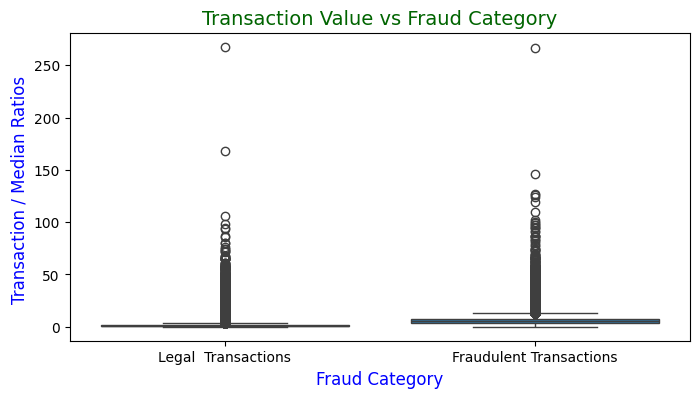

In [13]:
plt.figure(figsize=(8,4))
axis = sns.boxplot(x="fraud_label", y="ratio_to_median_purchase_price", data=table)
axis.set_title("Transaction Value vs Fraud Category", color="darkgreen", fontsize=14)
axis.set_ylabel("Transaction / Median Ratios ", color="blue", fontsize=12)
axis.set_xlabel("Fraud Category", color="blue", fontsize=12)
plt.show()

### Impact of Transaction Value on Fraud:
Ratio of purchase price to median cannot be used as a paramter to understand fraudulent transactions.

The boxplot does not show any visible pattern to highlight transactions that are fraudulent. 
All values are highly concentrated in similar groups for both fraudelent and legal transactions.

In [14]:
fraud_table = table[table["fraud"] == 1]
repeat_retailer_percentage = fraud_table["repeat_retailer"].value_counts(normalize = True) * 100

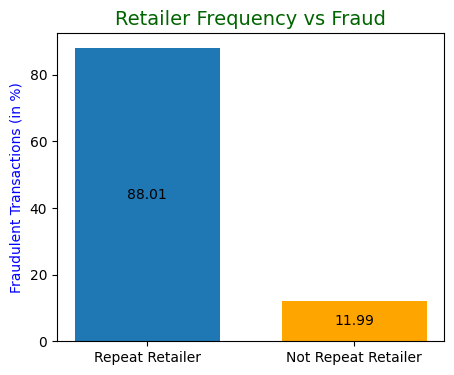

In [15]:
plt.figure(figsize=(5,4))
barplot = plt.bar(["Repeat Retailer", "Not Repeat Retailer"], repeat_retailer_percentage, width = 0.7, color=["#1f77b4", "orange"])
plt.bar_label(barplot, labels=round(repeat_retailer_percentage,2), label_type="center")
plt.ylabel("Fraudulent Transactions (in %)", color="blue", fontsize=10)
plt.title("Retailer Frequency vs Fraud", color="darkgreen", fontsize=14)
plt.show()

### Retailer and Fraud Correlation:

From the above bar plot we can see that about 88% of all fraudulent transactions have taken place when the retailers were repeated that is when the transaction happened from the same retailer. Remaining 12% of fraud happened when transactions were made with new retailers.

So this explains a relationship between retailer frequency and occurence of fraudulent transactions. Chances of transactions becoming fraudulent increases when the transactions take place with same retailer. Repeated Retailers therefore can be used as a possible parameter for identifying chances of fraudulent transactions.

In [16]:
chip_table = (table[table["used_chip"]==1][["fraud"]].value_counts(normalize=True) * 100)

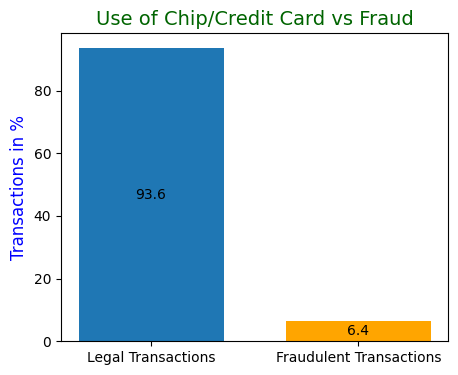

In [17]:
plt.figure(figsize=(5,4))
ax = plt.bar(["Legal Transactions","Fraudulent Transactions"], chip_table, width = 0.7, color=["#1f77b4", "orange"])
plt.bar_label(ax, labels=round(chip_table,2), label_type="center")
plt.ylabel("Transactions in %", color="blue", fontsize=12)
plt.title("Use of Chip/Credit Card vs Fraud", color="darkgreen", fontsize=14)
plt.show()

When **Chip/Credit Card is used** the fraudulent transactions are just **6.4%** as opposed to **93.6%** fraudulent transactions when **Chip/Credit Card is not used**.

In [18]:
pin_table = (table[table["used_pin_number"]==1][["fraud"]].value_counts(normalize=True) * 100)

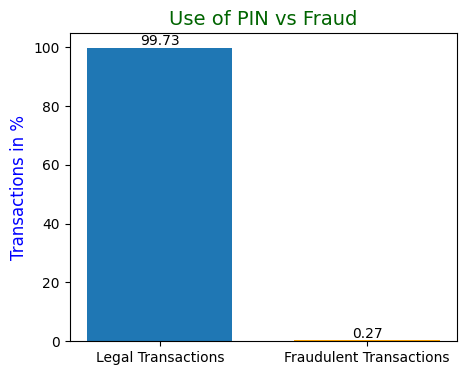

In [19]:
plt.figure(figsize=(5,4))
ax = plt.bar(["Legal Transactions","Fraudulent Transactions"], pin_table, width = 0.7, color=["#1f77b4", "orange"])
plt.bar_label(ax, labels=round(pin_table,2), label_type="edge")
plt.ylabel("Transactions in %", color="blue", fontsize=12)
plt.title("Use of PIN vs Fraud", color="darkgreen", fontsize=14)
plt.show()

On use of **PIN**, fraudulent transactions are reduced to a meagre **0.27%**

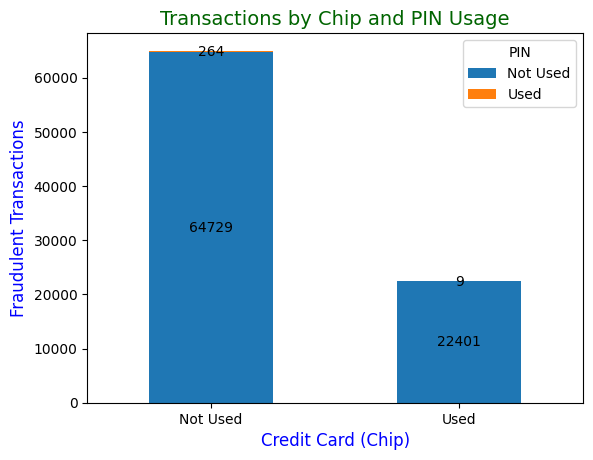

In [20]:
chip_pin_data = fraud_table[["used_chip", "used_pin_number"]].value_counts(normalize=False)

chip_pin_df = chip_pin_data.reset_index()
chip_pin_df.columns = ["used_chip", "used_pin_number", "fraud"]

chip_pin_df["chip_label"] = chip_pin_df["used_chip"].replace({0:"Not Used", 1:"Used"})

chip_pin_df_pivot = chip_pin_df.pivot(index="chip_label", columns="used_pin_number", values="fraud")

plot = chip_pin_df_pivot.plot(kind='bar', stacked=True)

for container in plot.containers:
    plot.bar_label(container, label_type="center")
    
plt.title("Transactions by Chip and PIN Usage", color="darkgreen", fontsize=14)
plt.legend(title="PIN", labels=["Not Used", "Used"])
plt.ylabel("Fraudulent Transactions", color="blue", fontsize=12)
plt.xlabel("Credit Card (Chip)", color="blue", fontsize=12)
plt.xticks(rotation=0)
plt.show()

### Data obtained from Graph: 
Around 74% of fraudulent transactions involves payments not using chip/credit cards or PIN.  
Approximately 25.6% of fraudulent transactions use credit card payment without using PIN as additional authentication method. 
Among remaning transactions that are fraudulent use of credit card with PIN amounts to only 0.009%.

The above figures highlight that use of chip with PIN is the most secure way to reduce fraudulent transactions. And non-chip transactions that does not involve PIN authentication accounts for about 3/4th of total fraudulent cases in this dataset.

Another highlight is use of PIN with chip payments reduces fraudulent transactions from 1/4th to meagre 0.009% making it least number of cases among fraudulent transactions.

In [21]:
online_order_data = table["online_order"].value_counts(normalize=True) * 100

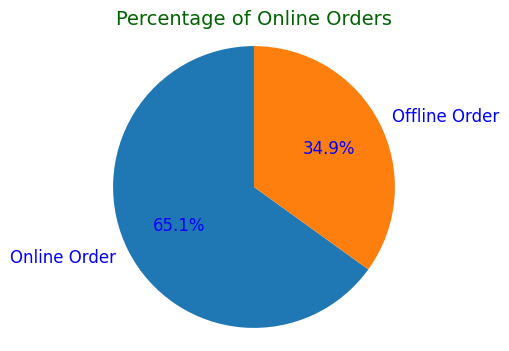

In [22]:
labels = ['Offline Order' if i == 0 else 'Online Order' for i in online_order_data.index]

plt.figure(figsize=(4, 4))
plt.pie(online_order_data.values, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'color': 'blue', 'fontsize': 12})
plt.title("Percentage of Online Orders", color="darkgreen", fontsize=14)
plt.axis("equal")
plt.show()

In [23]:
online_order_fraud_data = fraud_table["online_order"].value_counts(normalize=True) * 100

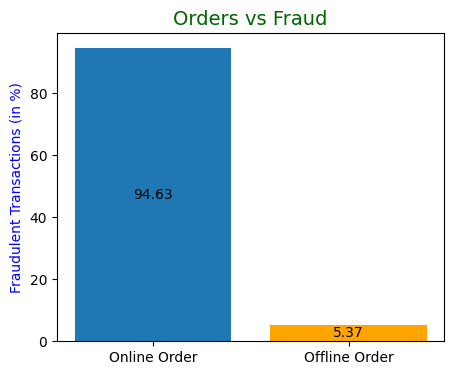

In [24]:
plt.figure(figsize=(5,4))
barplot = plt.bar(["Online Order", "Offline Order"], height=online_order_fraud_data, color=["#1f77b4", "orange"])
plt.bar_label(barplot, labels=round(online_order_fraud_data ,2), label_type="center")
plt.ylabel("Fraudulent Transactions (in %)", color="blue", fontsize=10)
plt.title("Orders vs Fraud", color="darkgreen", fontsize=14)
plt.show()

### Online vs. Offline Fraud Patterns:

About 95% of fraudulent transactions have taken place through online orders which clearly shows that online orders do have a part to play in increasing chances of a transaction becoming fraudulent transaction. 

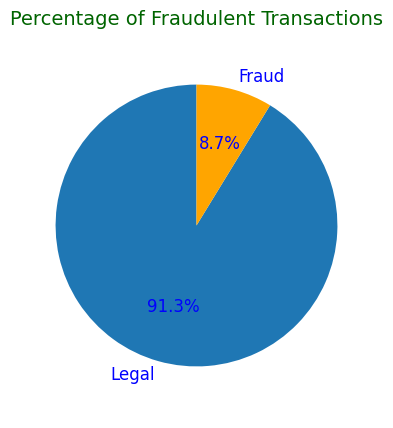

In [25]:
data = table["fraud"].value_counts(normalize=True) * 100
data.index = data.index.map({0:"Legal", 1:"Fraud"})
plt.figure(figsize=(4,5))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=90, colors=["#1f77b4", "orange"], textprops={'color': 'blue', 'fontsize': 12})
plt.title("Percentage of Fraudulent Transactions", color="darkgreen", fontsize=14)
plt.axis("equal")
plt.show()

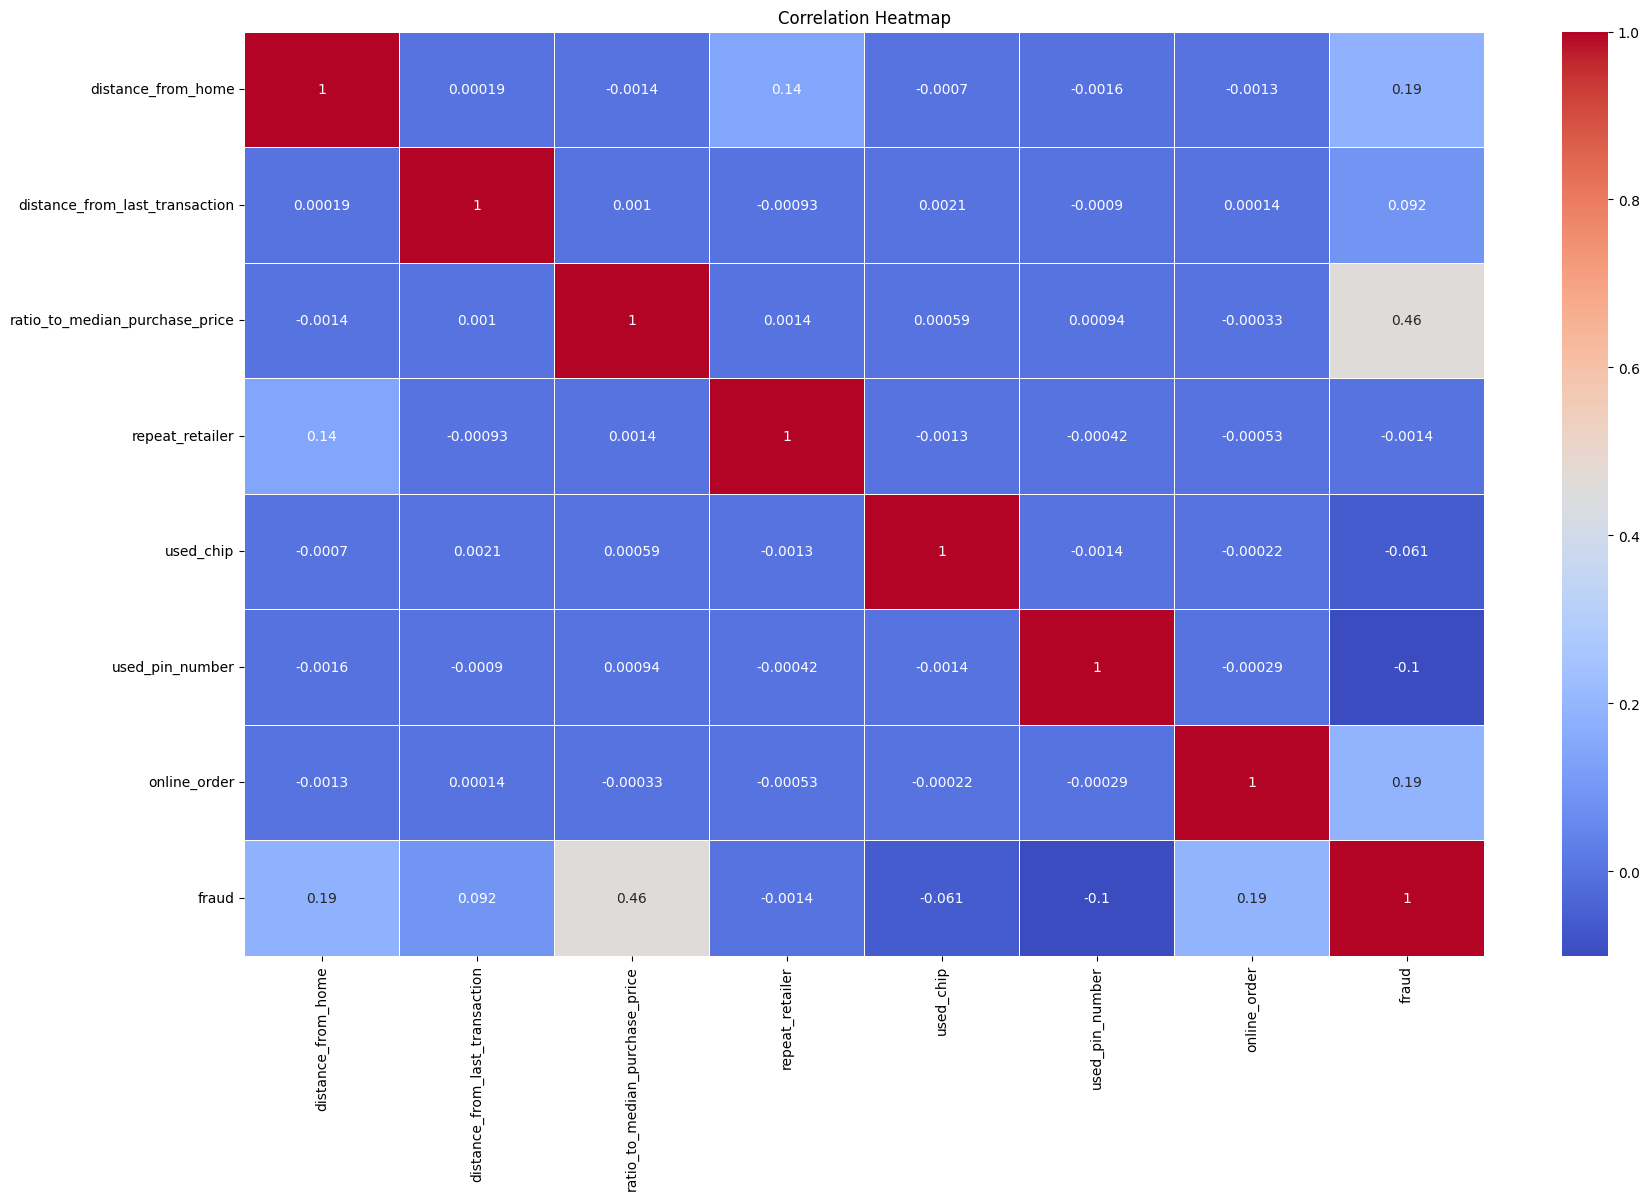

In [26]:
df = pd.read_csv('card_transdata.csv')
correlation_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, 
             annot=True, 
             cmap='coolwarm',   
             linewidths=0.5) 
plt.title("Correlation Heatmap")
plt.show()

## Preprocessing (Checking and removing Outliers)

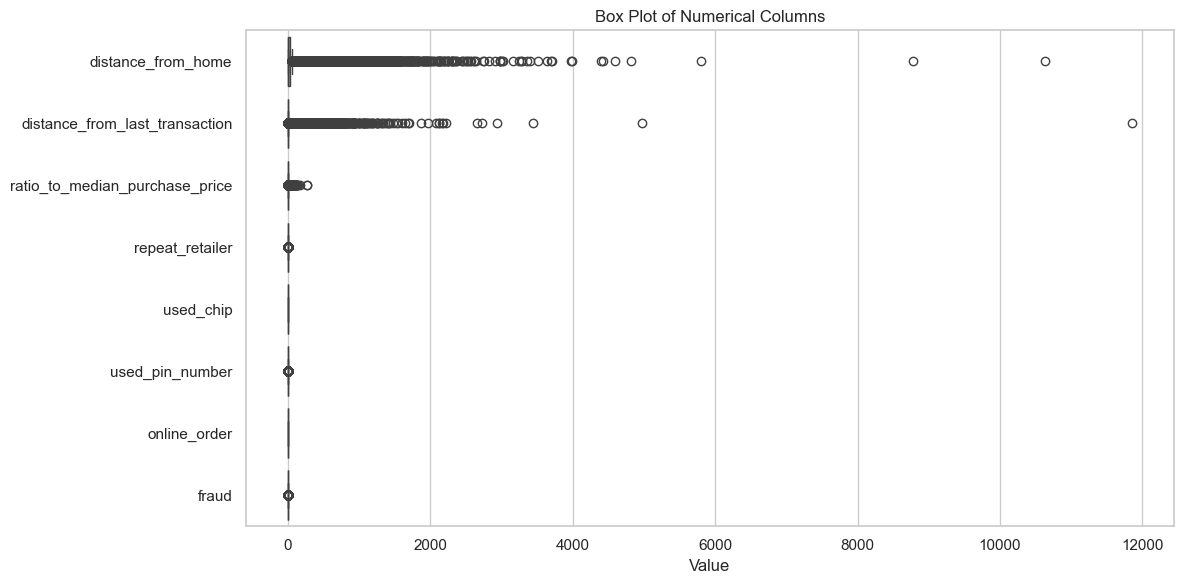

In [27]:
df = df.copy()

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.set(style="whitegrid", palette="Blues_r")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient="h")
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Value')
plt.tight_layout()
plt.show()

In [28]:
def method(df, n, features):
    outlier_list = []
    
    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        inter_quartile_range = Q3 - Q1
        outlier_step = 1.5 * inter_quartile_range
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_list.extend(outlier_list_column)
        
    outlier_list = Counter(outlier_list)        
    multiple_outliers = [k for k, v in outlier_list.items() if v > n ]
    
    print('Total number of deleted outliers:', len(multiple_outliers))
    
    return multiple_outliers

Outliers = method(df, 1, numerical_columns)

Total number of deleted outliers: 141044


In [29]:
df_out = df.drop(Outliers, axis=0).reset_index(drop=True)
print('Total number after deleted outliers:', len(df_out))

Total number after deleted outliers: 858956


## Splitting Data

In [30]:
x = df_out.drop("fraud", axis = 1)
y = df_out["fraud"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)

## ML Algorithms

### Logistic Regression

In [33]:
logreg = LogisticRegression(random_state=42, solver='liblinear')
#logreg.fit(X_train,y_train)
logreg.fit(X_oversampled, y_oversampled)
y_pred=logreg.predict(X_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9877118841389587
              precision    recall  f1-score   support

         0.0     1.0000    0.9876    0.9938    170281
         1.0     0.4172    1.0000    0.5887      1511

    accuracy                         0.9877    171792
   macro avg     0.7086    0.9938    0.7913    171792
weighted avg     0.9949    0.9877    0.9902    171792



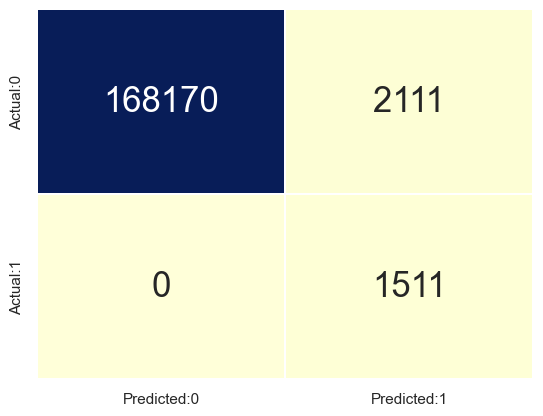

In [35]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="YlGnBu", cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.show()

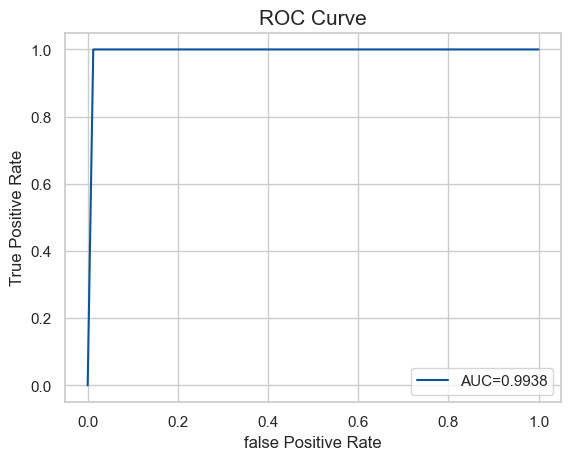

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr, tpr,label="AUC="+str(auc))
plt.title('ROC Curve', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

### Decision Tree

In [37]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_model = decision_tree.fit(X_oversampled, y_oversampled)
y_pred = decision_tree_model.predict(X_test)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000    170281
         1.0     1.0000    1.0000    1.0000      1511

    accuracy                         1.0000    171792
   macro avg     1.0000    1.0000    1.0000    171792
weighted avg     1.0000    1.0000    1.0000    171792



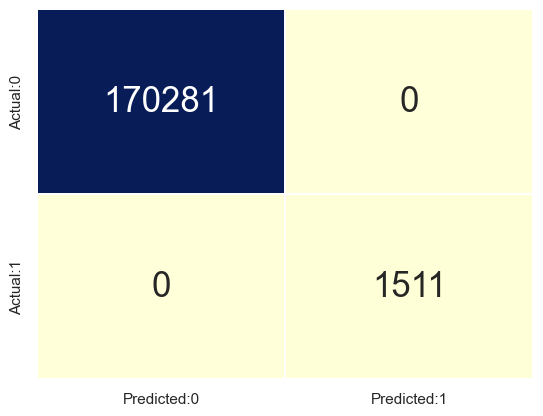

In [39]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="YlGnBu", cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.show()


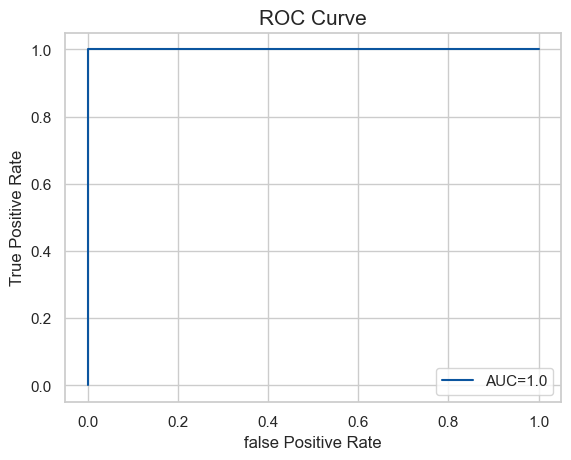

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr, tpr,label="AUC="+str(auc))
plt.title('ROC Curve', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

### XGBoost

In [41]:
xgboost_model = xgb.XGBClassifier(random_state=42)
xgboost_model.fit(X_oversampled, y_oversampled)
y_pred = xgboost_model.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.999598351494831
              precision    recall  f1-score   support

         0.0     0.9999    0.9997    0.9998    170281
         1.0     0.9694    0.9854    0.9774      1511

    accuracy                         0.9996    171792
   macro avg     0.9846    0.9926    0.9886    171792
weighted avg     0.9996    0.9996    0.9996    171792



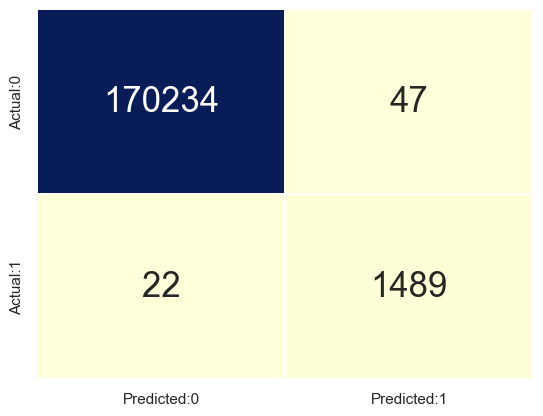

In [43]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="YlGnBu", cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.show()

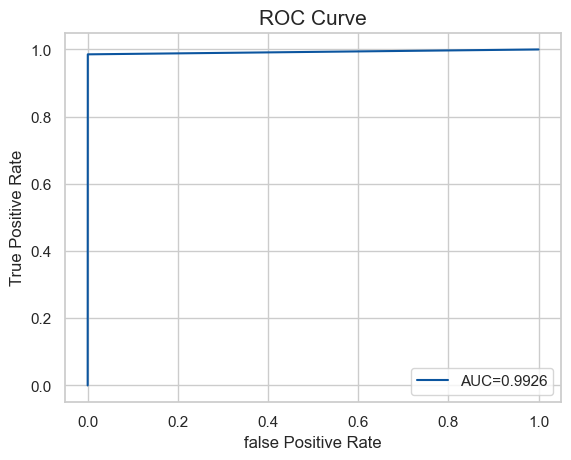

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),4)
plt.plot(fpr, tpr,label="AUC="+str(auc))
plt.title('ROC Curve', fontsize = 15)
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

## Conclusion:

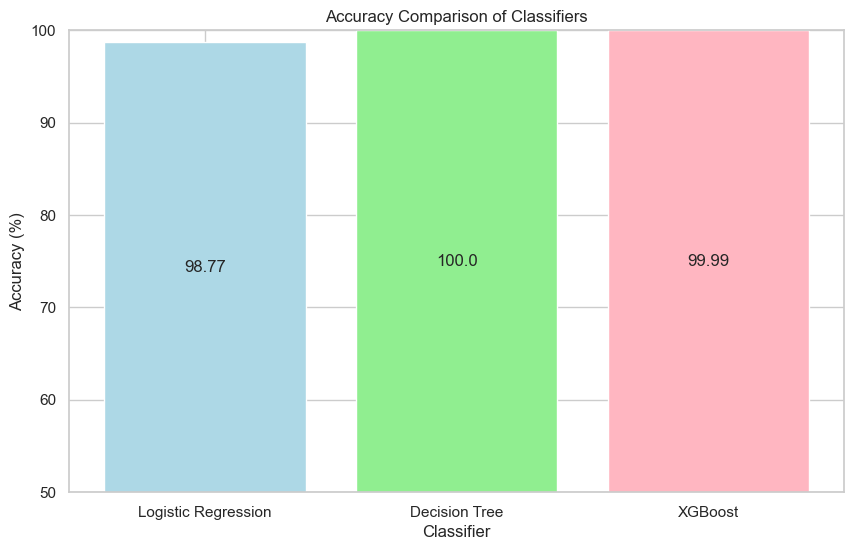

In [45]:
classifiers = ["Logistic Regression","Decision Tree","XGBoost"]
accuracies = [98.77, 100.00, 99.99]

plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracies, color=["lightblue", "lightgreen", "lightpink"])
plt.bar_label(bars, labels=accuracies, label_type="center")

# Adjust ylim to show differences clearly
plt.ylim(50, 100)

plt.title("Accuracy Comparison of Classifiers")
plt.xlabel("Classifier")
plt.ylabel("Accuracy (%)")

# Displaying the accuracy values on top of the bars
#for bar, accuracy in zip(bars, accuracies):
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

## Conclusion:

In this fraud analysis project, we implemented three machine learning classifiers—**Logistic Regression, Decision Tree, and XGBoost**—to detect fraudulent activities in a dataset with a significant class imbalance (91.3% non-fraudulent/legal and 8.7% fraudulent data). The classifiers achieved impressively **high accuracy scores of 98.77%, 100.00%, and 99.99%, respectively**.

Given the high imbalance, scaling and SMOTE have been used to improve the detection of non-fraudulent transactions. Along with it additional metrics like Precision, Recall, F1 score and ROC-AUC have been assessed that are more sensitive to the minority class (fraudulent transactions) in this imbalanced dataset.